# Week2　授業前課題3　行列積のスクラッチ  
以下のような行列A、Bを考えます。

$$
A = \begin{pmatrix}
-1&2&3\\
4&-5&6\\
7&8&-9\end{pmatrix}
, B = \begin{pmatrix}
0&2&1\\
0&2&-8\\
2&9&-1\end{pmatrix}
$$

### 【問題1】行列積を手計算する  
AとBの行列積を手計算で解いてください。
計算過程もマークダウンテキストを用いて説明してください。

#### <計算過程>
$C = A\times B$ とすると、$C$ の $i$ 行 $j$ 列目の要素 $C_{ij}$ は $A$ の $i$ 行目の行ベクトルと $B$ の $j$ 列目の列ベクトルの内積である。  
$1$ 行 $1$ 列目は

$$
\begin{align}
C_{11} &=(-1)\times0＋2\times0＋3\times2\\
&=0+0+6\\
&=6
\end{align}
$$

と計算され、$2$ 行 $1$ 列目は

$$
\begin{align}
C_{21} &=4\times0＋(-5)\times0＋6\times2\\
&=0+0+12\\
&=12
\end{align}
$$

となる。以下同様にして

$$
C = \begin{pmatrix}
6&29&-20\\
12&52&38\\
-18&-51&-48\end{pmatrix}
$$

を得る。

### 【問題2】NumPyの関数による計算  
この行列積はNumPyの``np.matmul()``や``np.dot()``、または``@``演算子を使うことで簡単に計算できます。
これらを使い行列積を計算してください。

In [1]:
# 行列の積
import numpy as np
A = np.array([[-1, 2, 3], [4, -5, 6], [7, 8, -9]])
B = np.array([[0, 2, 1], [0, 2, -8], [2, 9, -1]])
print("A = {}".format(A))
print("B = {}\n".format(B))
C = np.matmul(A, B)
print("C = {}".format(C) + "\n(np.matmul()使用)\n")
C = A.dot(B)
print("C = {}".format(C) + "\n(np.dot()使用)\n")
C = A@B
print("C = {}".format(C) + "\n(@使用)")

A = [[-1  2  3]
 [ 4 -5  6]
 [ 7  8 -9]]
B = [[ 0  2  1]
 [ 0  2 -8]
 [ 2  9 -1]]

C = [[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]
(np.matmul()使用)

C = [[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]
(np.dot()使用)

C = [[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]
(@使用)


### 【問題3】ある要素の計算を実装  
手計算をする際はまず行列Aの0行目と行列Bの0列目に注目し、以下の計算を行ったかと思います。

- 行列Aの(0,0)の要素 $a_{0,0}$ と行列Bの(0,0)の要素 $b_{0,0}$ を掛け合わせる
- 行列Aの(0,1)の要素 $a_{0,1}$ と行列Bの(1,0)の要素 $b_{1,0}$ を掛け合わせる
- 行列Aの(0,2)の要素 $a_{0,2}$ と行列Bの(2,0)の要素 $b_{2,0}$ を掛け合わせる
- それらの値を全て足し合わせる

数式で表すと

$$
\sum_{k=0}^{2}a_{0,k}b_{k,0}
$$

です。

この計算を``np.matmul()``や``np.dot()``、または``@``演算子を使わずに行うコードを書いてください。

In [2]:
# C = A×Bの(0,0)要素の計算
C_0_0 = 0
for k in range(A.shape[1]):
    C_0_0 += A[0][k] * B[k][0]
print("行列 C = A×B の (0,0) の要素は {}".format(C_0_0))

行列 C = A×B の (0,0) の要素は 6


### 【問題4】行列積を行う関数の作成  
問題3のコードを拡張し、行列積のスクラッチ実装を完成させてください。行列AとBを引数に受け取り、行列積を返す関数としてください。

行列積を計算する場合は、問題3の計算を異なる行や列に対して繰り返していくことになります。

計算結果である $3\times3$ の行列Cの各要素 $c_{i,j}$ は数式で表すと次のようになります。

$$
c_{i,j}=\sum_{k=0}^{2}a_{i,k}b_{k,j}
$$

for文を使い、ndarrayのインデックスを動かしていくことで、合計9つの要素が計算できます。インデックス $i$ や $j$ を1増やすと、次の行や列に移ることができます。
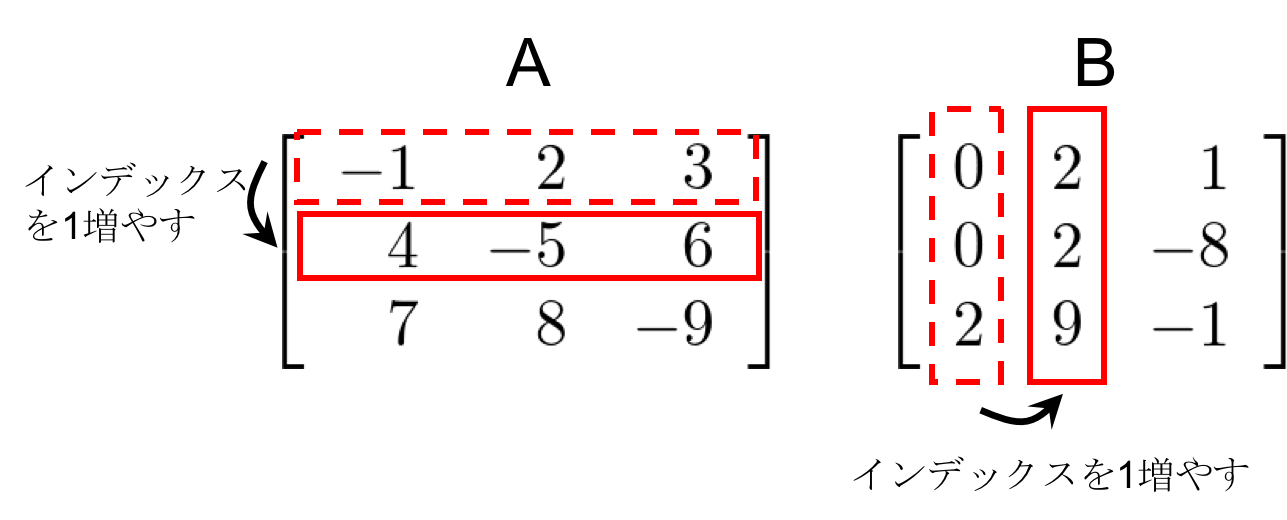

In [3]:
# 行列積のスクラッチ実装
def matrix_product(A, B):
    C = np.zeros([A.shape[0], B.shape[1]])
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                C[i][j] += A[i][k] * B[k][j]
    return C

# 上記のA,Bで例示
print("C = {}".format(matrix_product(A, B)) + "\n(スクラッチ実装使用)")

C = [[  6.  29. -20.]
 [ 12.  52.  38.]
 [-18. -51. -48.]]
(スクラッチ実装使用)


### 【問題5】計算が定義されない入力を判定する  
次に以下のような例を考えます。

$$
D = \begin{pmatrix}
-1&2&3\\
4&-5&6\end{pmatrix}
, E = \begin{pmatrix}
-9&8&7\\
6&-5&4\end{pmatrix}
$$

行列積DEはDの列数とEの行数が等しい場合に定義されていますから、この例では計算ができません。

問題4で作成した関数は、実装方法によってはこのDとEの配列を入力しても動いてしまう可能性があります。この場合、不適切な計算が行われることになります。また、途中でエラーになる場合でも、なぜエラーになったかが直接的には分かりづらいメッセージが表示されます。

if文などによってこれを防ぎ、入力される形に問題があることを``print()``を使い表示するコードを書き加えてください。

In [4]:
# 計算が定義できない場合を除外
def matrix_product(A, B):
    if A.shape[1] == B.shape[0]:
        C = np.zeros([A.shape[0], B.shape[1]])
        for i in range(A.shape[0]):
            for j in range(B.shape[1]):
                for k in range(A.shape[1]):
                    C[i][j] += A[i][k]*B[k][j]
        return C
    else:
        print("行列積は定義されません")

# 上記のD,Eで例示
D = np.array([[-1, 2, 3], [4, -5, 6]])
E = np.array([[-9, 8, 7], [6, -5, 4]])
print("D = {}".format(D))
print("E = {}".format(E))
matrix_product(D, E)

D = [[-1  2  3]
 [ 4 -5  6]]
E = [[-9  8  7]
 [ 6 -5  4]]
行列積は定義されません


### 【問題6】転置  
片方の行列を転置することで、行列積が計算できるようになります。
``np.transpose()``や``.T``アトリビュートを用いて転置し、行列積を計算してください。

In [5]:
# D × E(transepose)
print("E(転置) =\n{}\n".format(E.T))
print("D × E(転置) =\n{}\n\n".format(D @ E.T))

# D(transepose) × E
print("D(転置) =\n{}\n".format(D.T))
print("D(転置) × E =\n{}".format(D.T @ E))

E(転置) =
[[-9  6]
 [ 8 -5]
 [ 7  4]]

D × E(転置) =
[[ 46  -4]
 [-34  73]]


D(転置) =
[[-1  4]
 [ 2 -5]
 [ 3  6]]

D(転置) × E =
[[ 33 -28   9]
 [-48  41  -6]
 [  9  -6  45]]
